In [48]:
import os
os.environ['DISPLAY'] = ':0.0'
import trimesh
import numpy as np
import matplotlib.pyplot as plt
from pyrender import OrthographicCamera, Scene, OffscreenRenderer, Node, Mesh, SpotLight, DirectionalLight
from trimesh.transformations import transform_points

np.set_printoptions(suppress=True)

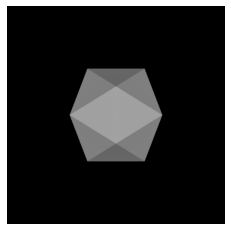

In [80]:
# Create pyrender-compatible mesh
mesh = trimesh.creation.icosahedron()
mesh.vertices[:, 2] -= 1
mesh.vertices *= 0.5
mesh_pr = Mesh.from_trimesh(mesh, smooth=False)

# Create scene and add head
scene = Scene(bg_color=[0, 0, 0])
head = Node(mesh=mesh_pr)
scene.add_node(head)

camera = OrthographicCamera(xmag=1, ymag=1)
zoom_out = 0
scene.add_node(Node(camera=camera))

# Create spotlight, directly in front of head (so need to translate)
# Also zoom out in z-direction
light = DirectionalLight(intensity=5)
scene.add_node(Node(light=light))

# Create renderer with viewport of the same size as original image
r = OffscreenRenderer(viewport_width=512, viewport_height=512)
color, depth = r.render(scene)

plt.imshow(color)
plt.axis('off');

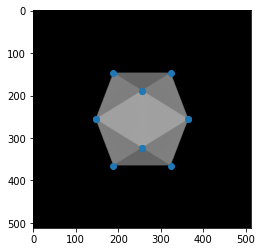

In [83]:
v = mesh.vertices
P = OrthographicCamera(xmag=1, ymag=1).get_projection_matrix(512, 512)
v = np.c_[v, np.ones(12)] @ P.T
v = v[:, :2]
v[:, 1] = -v[:, 1]
v = v * 0.5 + 0.5
v *= 512

plt.imshow(color)
plt.scatter(v[:, 0], v[:, 1])

In [82]:
P = np.array([
    [],
    [],
    []
])

array([[ 1.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        , -0.02001001, -1.0010005 ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])